In [6]:
# !pip3 install matplotlib
# !pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.1 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50, 35]
plt.rcParams['figure.dpi'] = 100



./data/results_06-21_08-56.csv


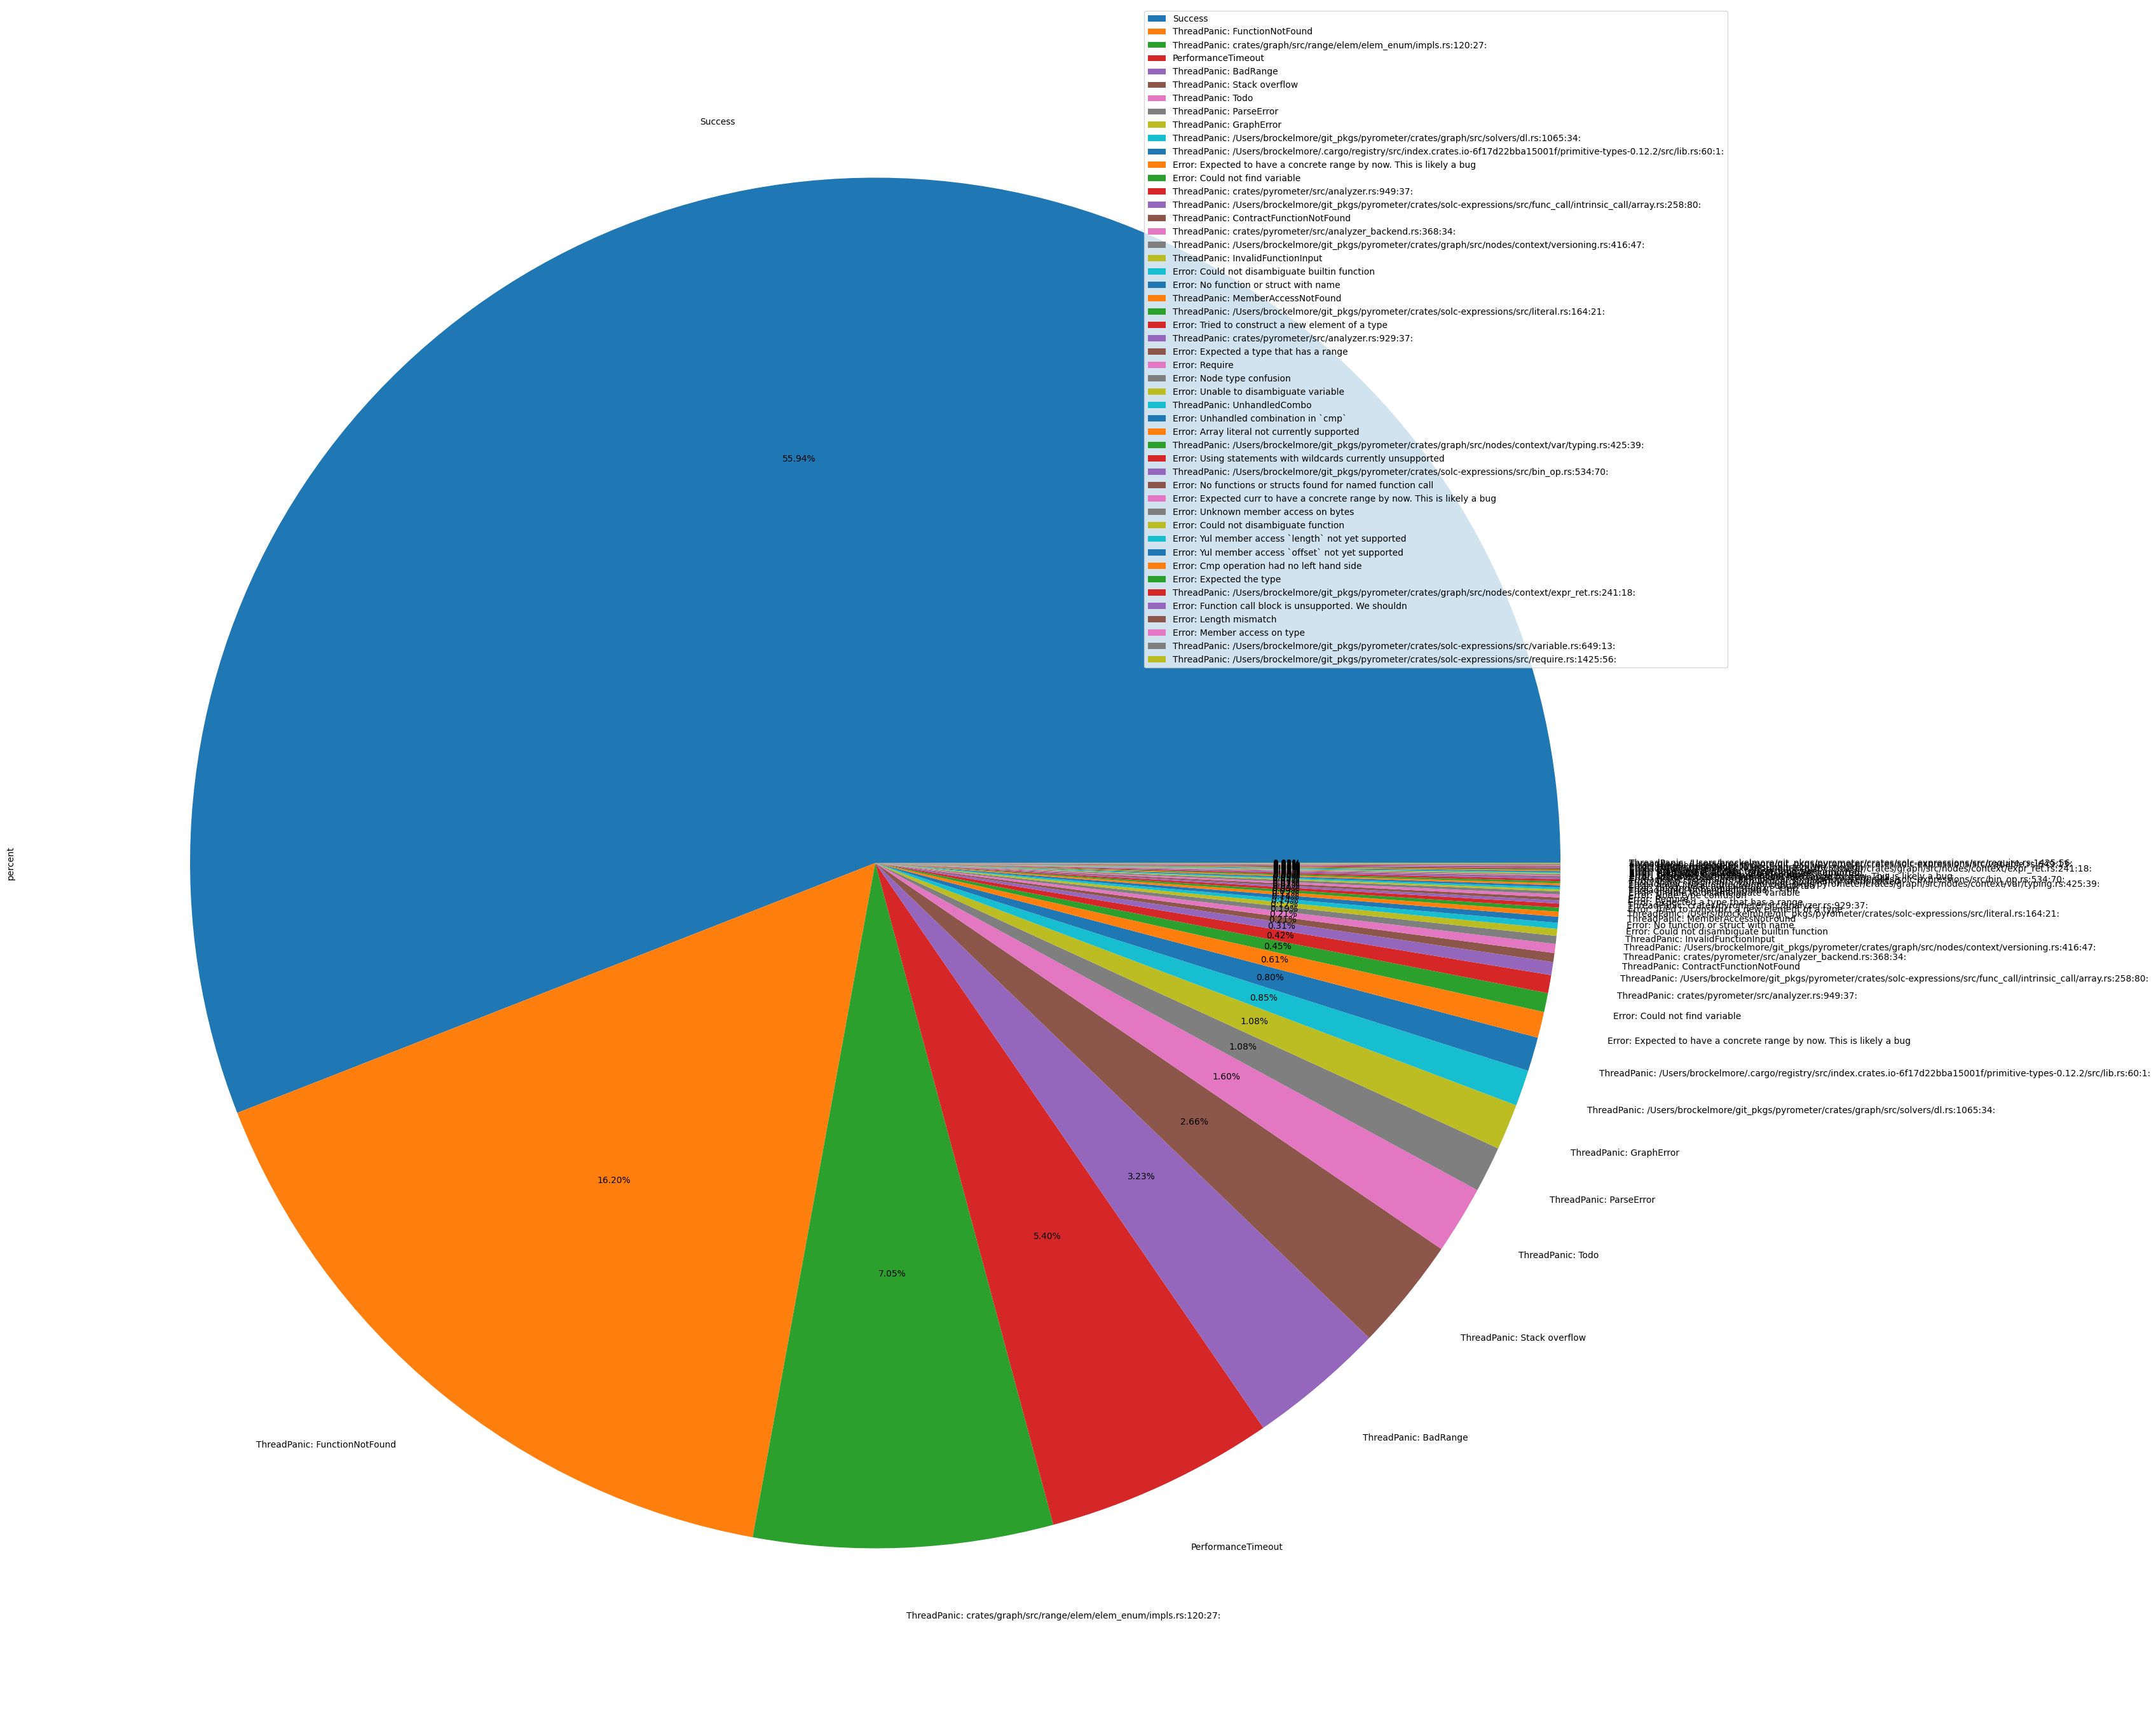

In [79]:
import glob
import os

list_of_files = glob.glob('./data/*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
df3 = pd.read_csv(latest_file)
df3.loc[df3["result"].str.startswith("ThreadPanic: 'Cyclic graph"), 'result'] = "Cyclic graph"
df3.loc[df3["result"].str.startswith("ThreadPanic: 'Could not find file:"), 'result'] = "Could not find file"
df4 = df3.groupby("result").count()
df4["percent"] = df4["bytecode_hash"] / len(df3.index) * 100
df4 = df4.sort_values("percent", ascending=False)
df5 = df4#[df4['percent'] > .25]
df5.plot.pie(y="percent", autopct='%.2f%%')
df3 = df3[df3["result"] != "Success"]
# df3 = df3[df3["result"] != "PerformanceTimeout"]

<Axes: ylabel='percent'>

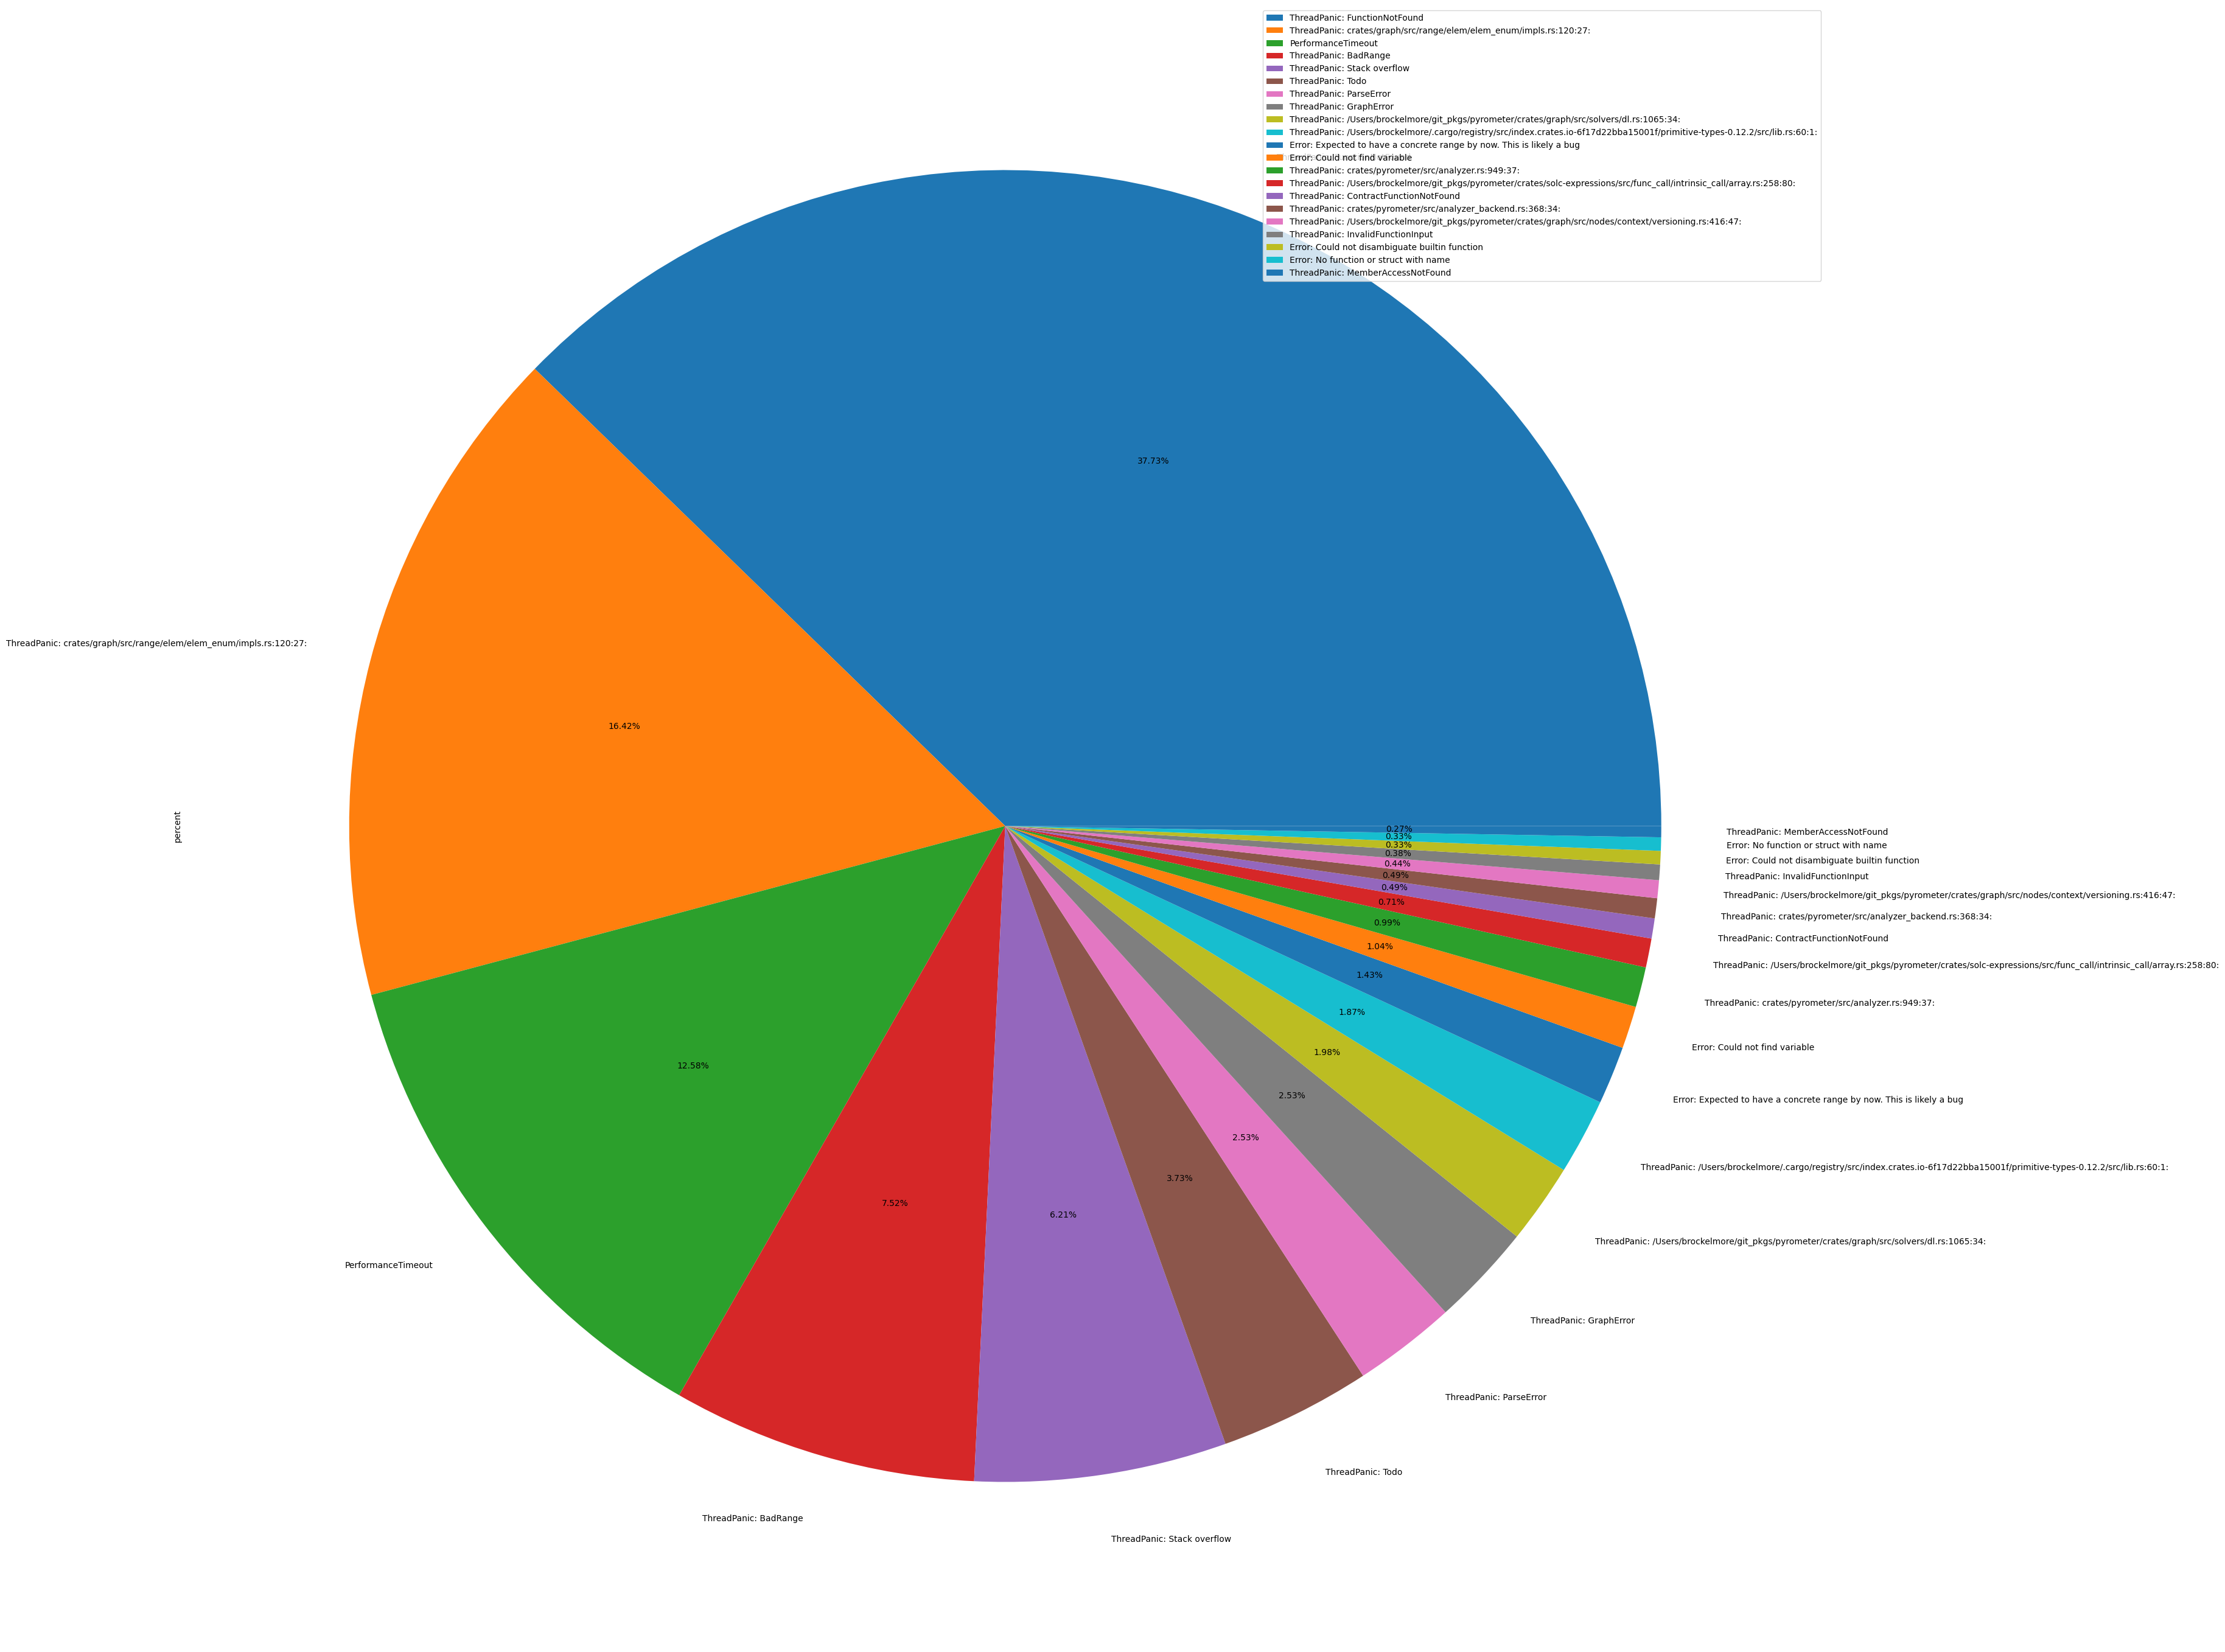

In [83]:
df4 = df3.groupby("result").count()
df4["percent"] = df4["bytecode_hash"] / len(df3.index) * 100
df4 = df4.sort_values("percent", ascending=False)
df5 = df4[df4['percent'] > .25]
df5.plot.pie(y="percent", autopct='%.2f%%')

In [84]:
df4 = df4.reset_index()
df4

,result,bytecode_hash,time (sec),source_type,source_size,percent
0,ThreadPanic: FunctionNotFound,687,687,687,687,36.757624
1,ThreadPanic: crates/graph/src/range/elem/elem_...,299,299,299,299,15.997860
2,PerformanceTimeout,229,229,229,229,12.252541
3,ThreadPanic: BadRange,137,137,137,137,7.330123
4,ThreadPanic: Stack overflow,113,113,113,113,6.046014
5,ThreadPanic: Todo,68,68,68,68,3.638309
6,ThreadPanic: ParseError,46,46,46,46,2.461209
7,ThreadPanic: GraphError,46,46,46,46,2.461209
8,ThreadPanic: /Users/brockelmore/git_pkgs/pyrom...,36,36,36,36,1.926164
9,ThreadPanic: /Users/brockelmore/.cargo/registr...,34,34,34,34,1.819155


In [85]:
idx = 0

most_common = df4.iloc[idx]["result"]

def smallest(res):
    range_df = df3[df3["result"] == res].reset_index(drop=True)
    single_range_df = range_df #[range_df["source_type"] == "SingleFile"].reset_index(drop=True)
    single_range_df = single_range_df.sort_values("source_size").reset_index(drop=True)
    if len(single_range_df.index) == 0:
        print("Non-single file")
        single_range_df = range_df[range_df["source_type"] == "JSON"].reset_index(drop=True)
        single_range_df = single_range_df.sort_values("source_size").reset_index(drop=True)
    return single_range_df

single_range_df = smallest(df4.iloc[idx]["result"])
print(single_range_df["bytecode_hash"][6], single_range_df["source_size"][0], df4.iloc[idx]["result"])

3e0366884c2e8a986a732d69063bfe771f8df96d1d4d4f3880bbf06193ccc066 1404 ThreadPanic: FunctionNotFound


In [54]:
df4.iloc[0]["result"]

'ThreadPanic: Stack overflow'

In [52]:
num = 0
print(single_range_df["bytecode_hash"][num], single_range_df["source_size"][num], most_common)

6101a7fe903c5d5cf570a85d31d9f1d54e89190f896c31722ed05e756f767c44 13275 ThreadPanic: Stack overflow


In [16]:
single_range_df

,bytecode_hash,result,time (sec),source_type,source_size
0,61ce65437e5fa464a17ed12fff92ee16b04df7b016fc04...,PerformanceTimeout,2.0,MultipleFiles,6324
1,61dfbb83659ff0733669e8cd6eec4e945fa884c17fca80...,PerformanceTimeout,2.0,SingleFile,10561
2,61b48d6ae686586f6cb2b1bcdb018c5d8152660ee992db...,PerformanceTimeout,2.0,SingleFile,11601
3,61a2075c264b00cdae8dcc8516d5649832b853ffe51c45...,PerformanceTimeout,2.0,SingleFile,12584
4,6137b827f342c3c99e460a21a1a9d04cb91763c5d827e8...,PerformanceTimeout,2.0,JSON,12915
5,61e7081404a3cb438ad0acd3eac98e3b8b6c3c47a8e5fe...,PerformanceTimeout,2.0,SingleFile,14631
6,613b8a1899d8b8c90f5dfd855d59d49af6d6a1243d099c...,PerformanceTimeout,2.0,SingleFile,17729
7,61fe60851ffb48c40d9ed82e6f4cb03fc3616ce4eb74d4...,PerformanceTimeout,2.0,SingleFile,17740
8,6132ab40178ea14c367cf3c32e77df43853d6bebc4dc00...,PerformanceTimeout,2.0,SingleFile,17828
9,61b490a370e11a168728889ab8c0fbfe810782c3852161...,PerformanceTimeout,2.0,SingleFile,17890


In [110]:
most_common

'Error: Could not find variable'

In [111]:
df3[df3["result"] == most_common]

,bytecode_hash,result,time (sec),source_type,source_size
12,61d3ca02388e9d3937b33203e69ee99780c328d540c63b...,Error: Could not find variable,0.366,SingleFile,20063
13,614b8db3fa7d70d7f8369ff9cca21049df4bf56aef08bc...,Error: Could not find variable,0.025,JSON,9059
14,6109d95e3a70fdf3910ba28b9b07b1b7c2ffe82dfd52be...,Error: Could not find variable,1.196,SingleFile,21650
38,61b20102215c22a111ba6518448f6095ac5a15be27533f...,Error: Could not find variable,0.970,SingleFile,21673
56,61b48d6ae686586f6cb2b1bcdb018c5d8152660ee992db...,Error: Could not find variable,0.140,SingleFile,11601
...,...,...,...,...,...
2419,92ca0598e4025a737568389555e40fc9cf0cd0eebfbd68...,Error: Could not find variable,1.064,JSON,12011
2429,922e0eeb14af254a4587f56a6d2bbfb66a91bb8e34afad...,Error: Could not find variable,0.952,SingleFile,11481
2446,92a698fae15e55fd040378a2ff3eca5ef1f3d45953c927...,Error: Could not find variable,0.114,SingleFile,23294
2455,9274022331d202e4a165c20fa89d45369801377370fa80...,Error: Could not find variable,0.017,SingleFile,9793


In [48]:
df3[df3["result"].str.startswith("ThreadPanic:")]

,bytecode_hash,result,time (sec),source_type,source_size
69,619f2f5d838af22897860067bedb23ed52077ae806596b...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,0.097,SingleFile,16362
118,6177c9b0d9568e72c576ebfa7640c974725e8a2405d6cc...,ThreadPanic: crates/pyrometer/src/analyzer.rs:...,0.004,JSON,4699
123,612bf40a744f2d11966d2a53d6defc24ad2ff79605aec1...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,1.620,SingleFile,44768
221,619d1269b52c013b8d9ec583d4d9b867a43ba8a08372d1...,ThreadPanic: crates/pyrometer/src/analyzer.rs:...,0.005,JSON,68924
227,6135b62a3a5f6ed21408c83b3ce280b35144264cd680d6...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,0.033,SingleFile,15237
359,61a58d908e5456f7fe48605cf0274f6067679395bdcfc4...,ThreadPanic: /Users/brockelmore/git_pkgs/pyrom...,0.018,JSON,17975
372,61545ed773f522cbdf7fb2fde3590b89c67b58b2adbd1b...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,1.050,SingleFile,22655
374,6163ff9a29146e1da63c4ee21bad1cef4a4796c25a2133...,ThreadPanic: /Users/brockelmore/git_pkgs/pyrom...,0.004,JSON,71143
471,61935f3dea68522bfe62a20bf520eda0d3275fb48b27d2...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,0.039,SingleFile,80615
486,61649d57e3e6c692cd0f0d60d9ca1370c2a03ebbdbdce3...,ThreadPanic: crates/graph/src/solvers/atoms.rs...,0.070,MultipleFiles,33564


In [86]:
import requests as r

res = r.get("https://mrkl.uniswap.org/")

In [89]:
import json

In [91]:
claims = json.loads(res.text)

In [94]:
claims["claims"]["0x683A78bA1f6b25E29fbBC9Cd1BFA29A51520De84"]

{'index': 103270,
 'amount': '0x15af1d78b58c400000',
 'proof': ['0x33bbcdf43785409660d96b1c0720a48b591628a894826745a6027a4ca61c9108',
  '0xe87235142a1b50ad5104e56d44fcbec954679c86d0ac8bf93175c134e0ba3809',
  '0x0c07d0665f3d63e2df926a482b14b3704bf18bed07c070b2c644950e5ae48109',
  '0x216a6795443a8e86cd1fb2cbe4de4014f57184ebe150896ed603be5586f56d7b',
  '0x8d2f8cc54a9e24ab767e4a487846ef74c00aace7eba69498c4848ded8cf47e1c',
  '0x664b0fd6c26a7b31ab5fd45a23d50b7bdb453282185a15b1f87fcac9c124bfbb',
  '0x0f8624c3a8761f860161ca071d40c709cf94bbf91dcbf711da4e8dd858671723',
  '0x314c49c598fee018d0bd05ea61db140aac83e464b72816f69ea4fa8e014367e6',
  '0xfe773ea166f00e2cb87b3af571c93ae24c47e0ca2662427d9d51e51f8dd3c416',
  '0x9d540eaa1a6871847f33eb23dbc2fba12145b30f15f83b8edc9542674cd5caf0',
  '0x0b439c8983a989dc0aea5c016ca0da5f526bcab301fe58646ff5547eaa7f985e',
  '0xdc19eea03ec364190792180a880f998e99b117b71ffa4e745d2f4997788855a1',
  '0xea22f145cede73fbcbefa7e1a4bd34e7d7497aaf879e619a3d52c167775bd522',
  